# Linear Regression

In [47]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random


def get_column(data, index):
    data = np.array(data)
    result = data[:, index]

    return result


def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=",", skip_header=1).tolist()
    N = len(data)

    # get tv (index =0)
    tv_data = get_column(data, 0)
    # get radio ( index =1)
    radio_data = get_column(data, 1)
    # get newspaper ( index =2)
    newspaper_data = get_column(data, 2)
    # get sales ( index =3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

In [48]:
X, y = prepare_data("advertising.csv")
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[np.float64(624.1), np.float64(175.10000000000002), np.float64(300.5), np.float64(78.9)]


In [49]:
def initialize_params():
    w1, w2, w3, b = (
        0.016992259082509283,
        0.0070783670518262355,
        -0.002307860847821344,
        0,
    )
    return w1, w2, w3, b

In [50]:
def predict(x1, x2, x3, w1, w2, w3, b):

    result = x1 * w1 + x2 * w2 + x3 * w3 + b
    return result

In [51]:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
y

1.0

In [52]:
def compute_loss(y_hat, y):

    loss = (y_hat - y) ** 2
    return loss

In [53]:
l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [54]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    return dl_dwi

In [55]:
def compute_gradient_b (y , y_hat ) :
    dl_db = 2 * (y_hat - y)
    return dl_db

In [56]:
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-1.0
-3.0


In [57]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi


def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b


after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)
# print(after_wi)

1.000005
0.50001


In [58]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

In [59]:
X, y = prepare_data("advertising.csv")

(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [60]:
tv = 19.2
radio = 35.9
newspaper = 51.3
X, y = prepare_data("advertising.csv")
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f"predicted sales is { sales }")

predicted sales is 8.176413319549823


In [61]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

In [62]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [63]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):

        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss(y, y_hat)

            # accumulate loss
            loss_total += loss

            # compute gradient w1 , w2 , w3 , b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1 , w2 , w3 , b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
            
        # ( after processing N samples ) - update parameters

        # update parameters
        w1 = update_weight_wi(w1, dw1_total/N, lr)             
        w2 = update_weight_wi(w2, dw2_total/N, lr)             
        w3 = update_weight_wi(w3, dw3_total/N, lr)             
        b = update_weight_b(b, db_total/N, lr)

        # logging
        losses.append(loss_total / N)
    return (w1, w2, w3, b, losses)

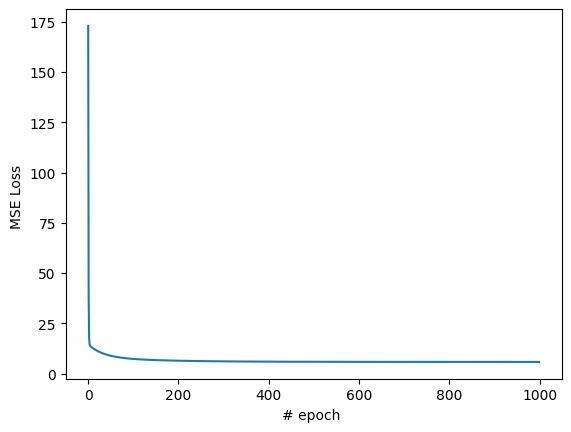

In [64]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X, y, epoch_max=1000, lr=1e-5
)
# print(losses)
plt.plot(losses)
plt.xlabel("# epoch ")
plt.ylabel("MSE Loss ")
plt.show()

In [65]:
X, y = prepare_data("advertising.csv")
# using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X, y, epoch_max=1000, lr=1e-5
)

print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [66]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=",", skip_header=1).tolist()

    # get tv ( index =0)
    tv_data = get_column(data, 0)

    # get radio ( index =1)
    radio_data = get_column(data, 1)

    # get newspaper ( index =2)
    newspaper_data = get_column(data, 2)

    # get sales ( index =3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    # Create list of features for input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

In [ ]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    # comment this line for real application
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]
    # return [bias , w1 , w2 , w3]

In [100]:
def predict(X_features, weights):
    result = np.dot(X_features, weights)
    return result


def compute_loss(y_hat, y):
    return (y_hat - y) ** 2


def compute_gradient_w(X_features, y, y_hat):
    X_features = np.array(X_features)
    return 2 * X_features * (y_hat - y)


def update_weight(weights, dl_dweights, lr):
    return weights - lr * dl_dweights

In [101]:
def implement_linear_regression(X_feature, y_ouput, epoch_max=50, lr=1e-5):

    losses = []
    weights = initialize_params()
    N = len(y_ouput)
    for epoch in range(epoch_max):
        # print(" epoch ", epoch)
        for i in range(N):
            # get a sample - row i
            features_i = X_feature[i]
            y = y_ouput[i]

            # compute output
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1 , w2 , w3 , b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss)
    return weights, losses

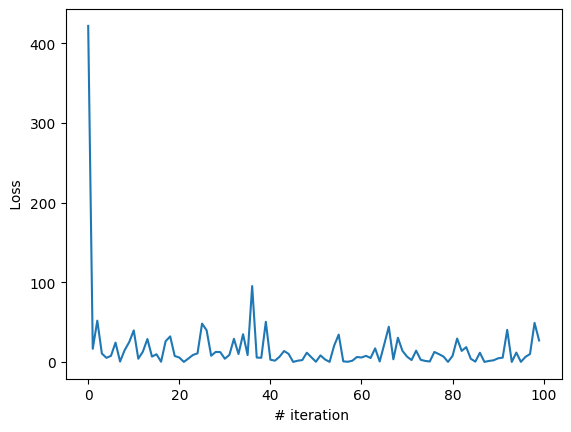

In [102]:

X, y = prepare_data("advertising.csv")
W, L = implement_linear_regression(X, y)
plt.plot(L[0:100])
plt.xlabel("# iteration ")
plt.ylabel(" Loss ")
plt.show()

In [96]:
X, y = prepare_data("advertising.csv")
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999])

31.070006369818007
